In [336]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')

In [337]:
churn_data = pd.read_csv('data/churn.csv')
# churn_data.head()

In [338]:
# churn_data.info()

In [339]:
churn_data = churn_data.drop(['RowNumber', 'Surname'], axis=1)     # Удаляем ненужные столбцы

In [340]:
def get_credit_score_cat(credit_score):     # функция разбиения кредитного рейтинга на категории
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [341]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)   # Добавляем категории кредитного рейтинга
churn_data['AgeCat'] = (churn_data['Age']//10+1) * 10     # Добавляем возрастные категории
# display(churn_data['AgeCat'].value_counts())


In [342]:
cols_to_exclude = ['CustomerId', 'Balance', 'Age', 'Tenure','EstimatedSalary'] # список столбцов, которые мы не берём во внимание
max_unique_count = 20 # задаём максимальное число уникальных категорий
for col in churn_data.columns: # цикл по именам столбцов
    if churn_data[col].nunique() < max_unique_count and col not in cols_to_exclude: # проверяем условие
        churn_data[col] = churn_data[col].astype('category') # преобразуем тип столбца
display(churn_data.info())
display(churn_data.nunique())
display(churn_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   CreditScore      10000 non-null  int64   
 2   Geography        10000 non-null  category
 3   Gender           10000 non-null  category
 4   Age              10000 non-null  int64   
 5   Tenure           10000 non-null  int64   
 6   Balance          10000 non-null  float64 
 7   NumOfProducts    10000 non-null  category
 8   HasCrCard        10000 non-null  category
 9   IsActiveMember   10000 non-null  category
 10  EstimatedSalary  10000 non-null  float64 
 11  Exited           10000 non-null  category
 12  CreditScoreCat   10000 non-null  category
 13  AgeCat           10000 non-null  category
dtypes: category(8), float64(2), int64(4)
memory usage: 548.4 KB


None

CustomerId         10000
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
CreditScoreCat         5
AgeCat                 9
dtype: int64

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat,AgeCat
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair,50
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair,50
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor,50
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good,40
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Good,40
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Poor,40
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Good,40
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Good,50


## Задание 9.1

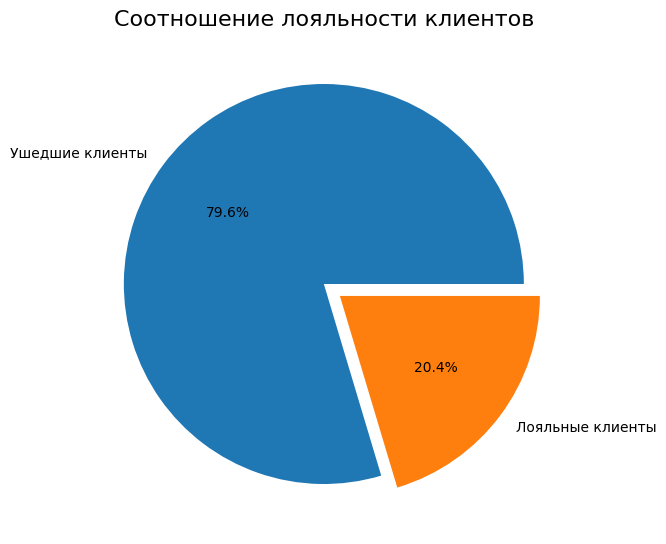

In [343]:
exited_count = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_count,
    labels=['Ушедшие клиенты', 'Лояльные клиенты'],
    autopct='%.1f%%',
    explode = [0, 0.1]
)
axes.set_title('Соотношение лояльности клиентов', fontsize=16);

Из всех пришедших клиентов остаются около 20%. И наверняка процент лояльных клиентов возможно увеличить, если удастся заинтересовать их новыми продуктами или дополнительными льготными условиями.

## Задание 9.2

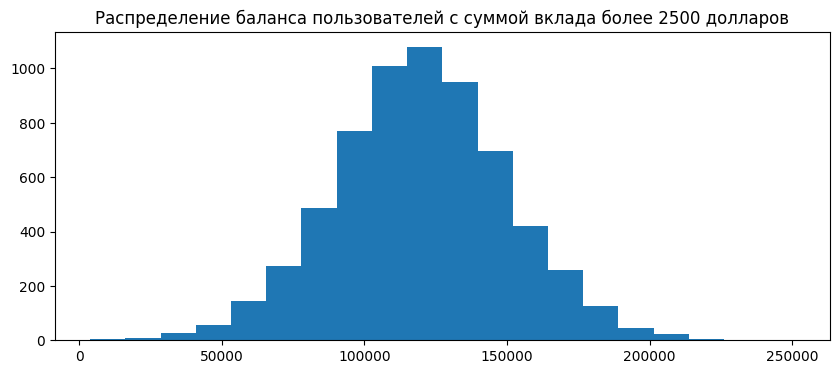

In [344]:
balance_data = churn_data[churn_data['Balance'] > 2500]

#визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

#гистограмма
axes.hist(x=balance_data['Balance'],
             bins = 20)
axes.set_title('Распределение баланса пользователей с суммой вклада более 2500 долларов');

Основная масса пользователей со значительными вкладами - это пользователи с суммами вкладов примерно от 80 до 170 тысяч долларов.

Вывод: Как вариант можно попытаться заинтересовать большую массу вкладчиков нарастить свои вклады до 200 тысяч долларов и более дополнительными условиями при увеличении сумм вкладов. 

## Задание 9.3

In [345]:
# Переименуем категории в 'Exited"
churn_data['Exited'].cat.categories = ['Ушедшие','Лояльные']
# churn_data

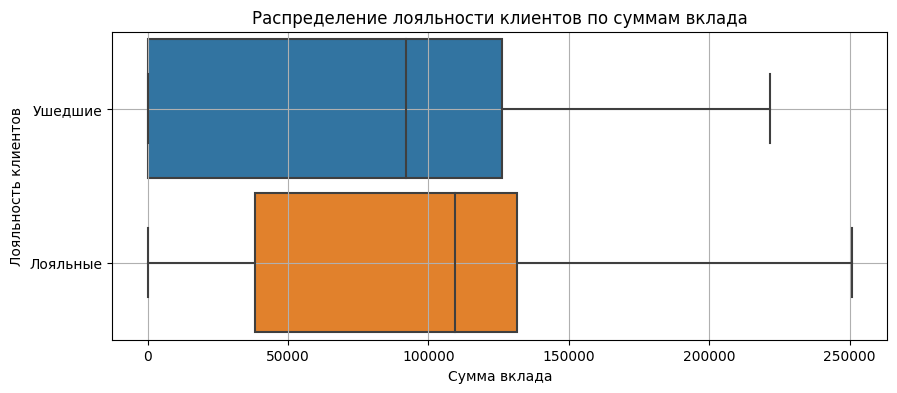

In [346]:
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение лояльности клиентов по суммам вклада');
boxplot.set_xlabel('Сумма вклада');
boxplot.set_ylabel('Лояльность клиентов');
boxplot.grid()

Среди ушедших клиентов намного болшее количество тех, кто имел минимальные суммы вкладов. Вполне возможно, что у них не было цели увеличивать суммы вкладов, а у конкурентов для себя они увидели более выгодные условия.

## Задание 9.4

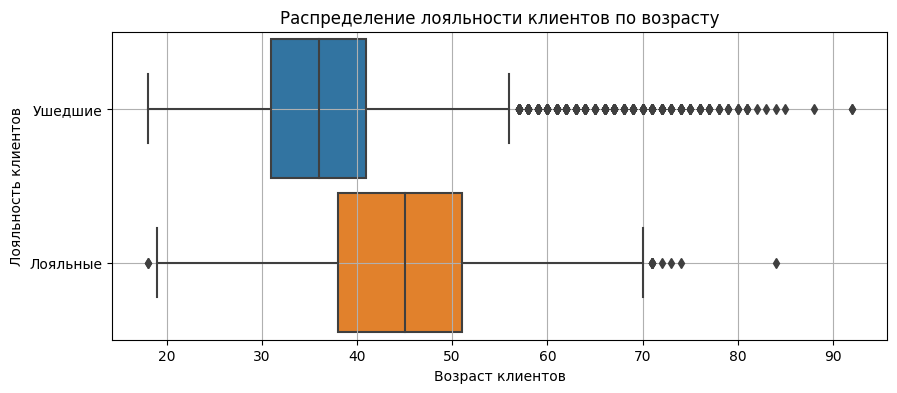

In [347]:
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение лояльности клиентов по возрасту');
boxplot.set_xlabel('Возраст клиентов');
boxplot.set_ylabel('Лояльность клиентов');
boxplot.grid()

В группе ушедших клиентов значительно большее количество потенциальных выбросов среди клиентов старше 55 лет. Вероятно, это связано со смертью клиентов старшего возраста, а не с оттоком из за переноса счетов в другие банки.

Следует обратить внимание на возрастную группу 30-40 лет, так как именно в этой возрастной группе большинство клиентов покинули банк.

## Задание 9.5

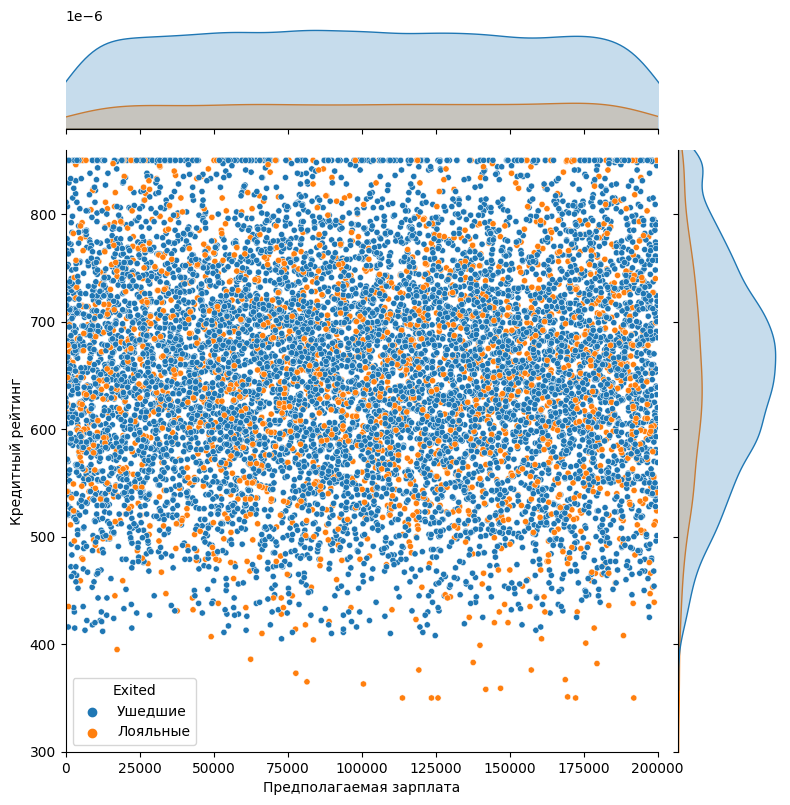

In [386]:
jointplot = sns.jointplot(
    data=churn_data, 
    x='EstimatedSalary', 
    y='CreditScore',
    s=20,
    hue='Exited',
    xlim = (0, 200000),
    ylim = (300, 860),
    height=8,
);
jointplot.set_axis_labels(xlabel='Предполагаемая зарплата', ylabel='Кредитный рейтинг');

Какой либо взаимосвязи между кредитным рейтингом клиента и его предполагаемой зарплатой не наблюдается.
Так же не видно явной взаимосвязи этих признаков с лояльностью клиентов.

Отсутствие случаев оттока клиентов с кредитным рейтингом до 400 связано с тем, что это скорей всего действующие клиенты, которые впервые пользуются банковскими услугами.

## Задание 9.6